In [ ]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_diabetes

In [10]:
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)
data = pd.concat([X, y], axis=1)
data.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [12]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

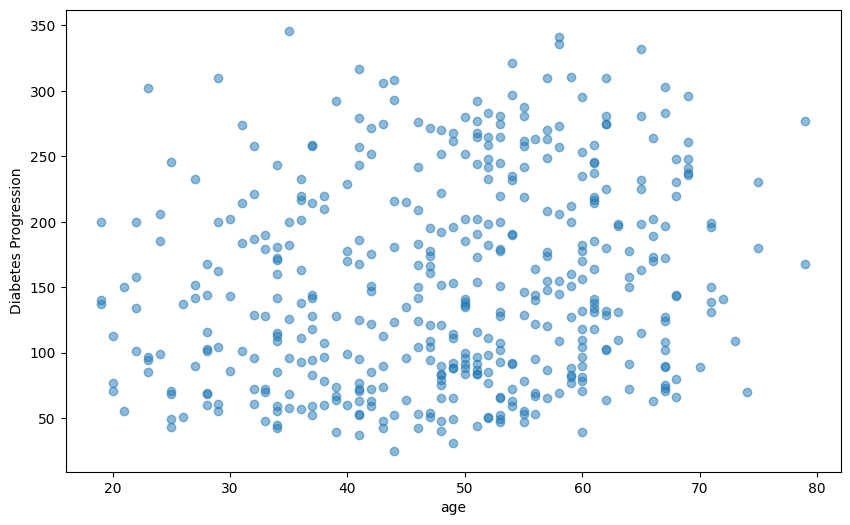

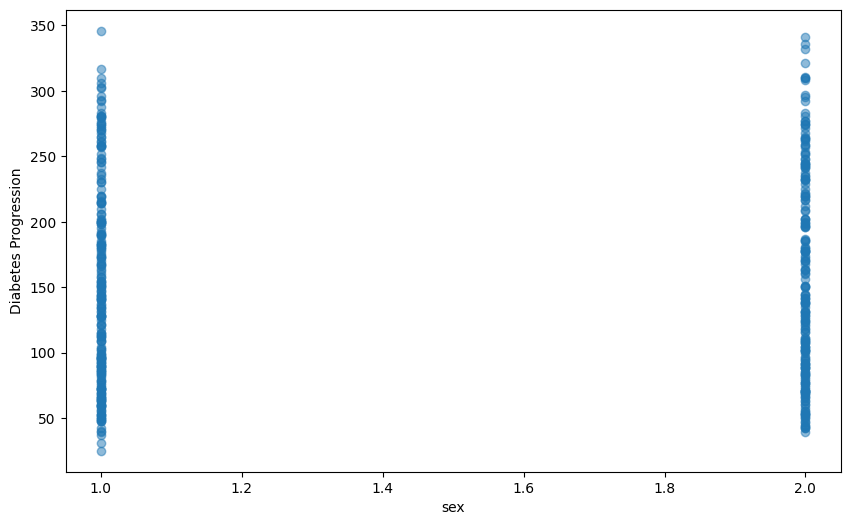

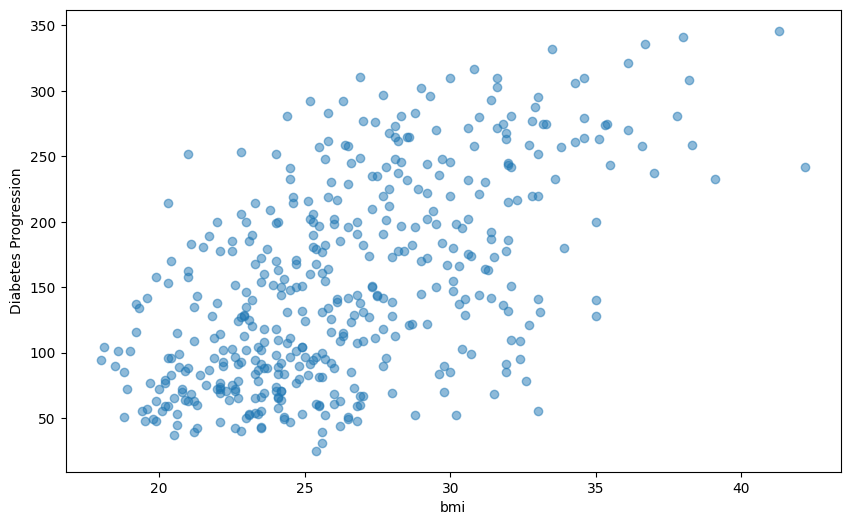

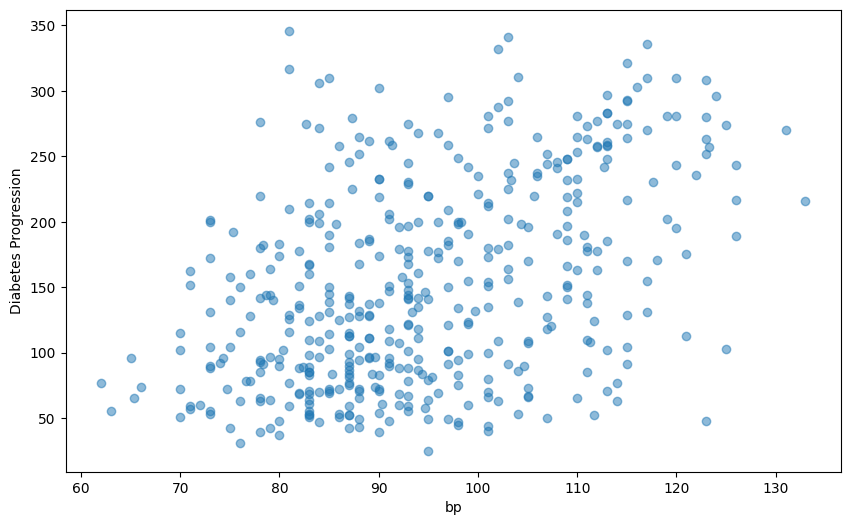

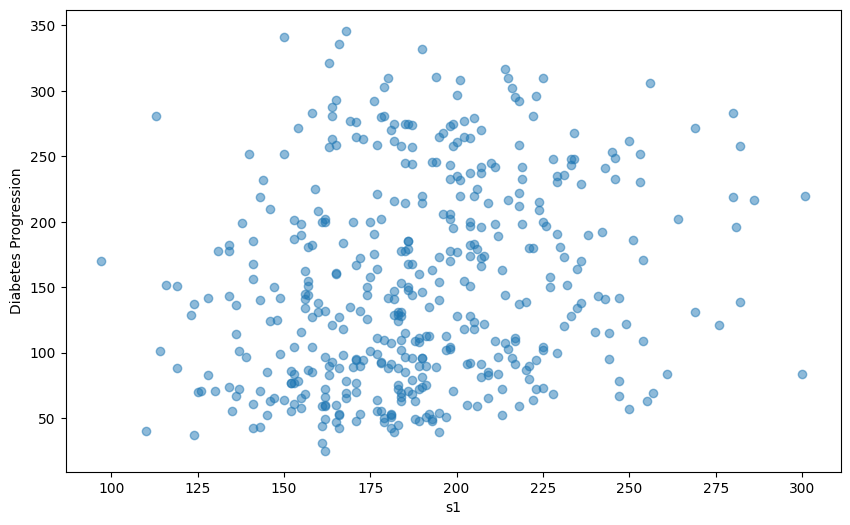

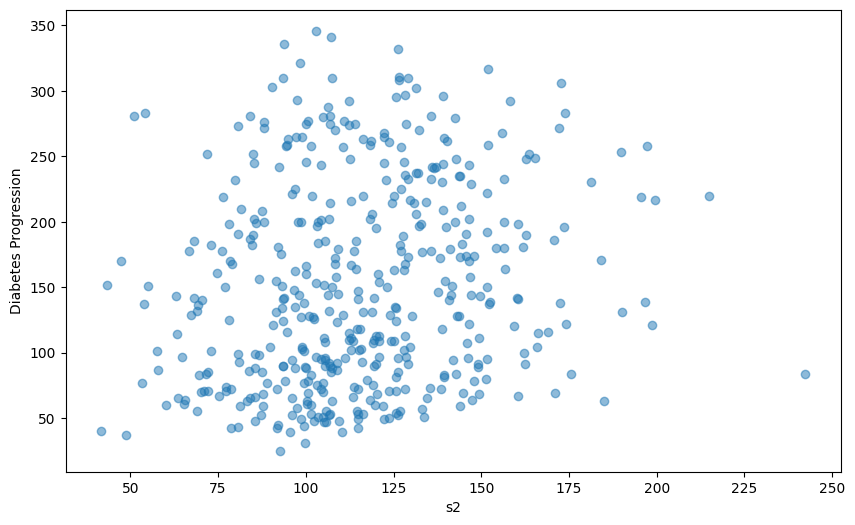

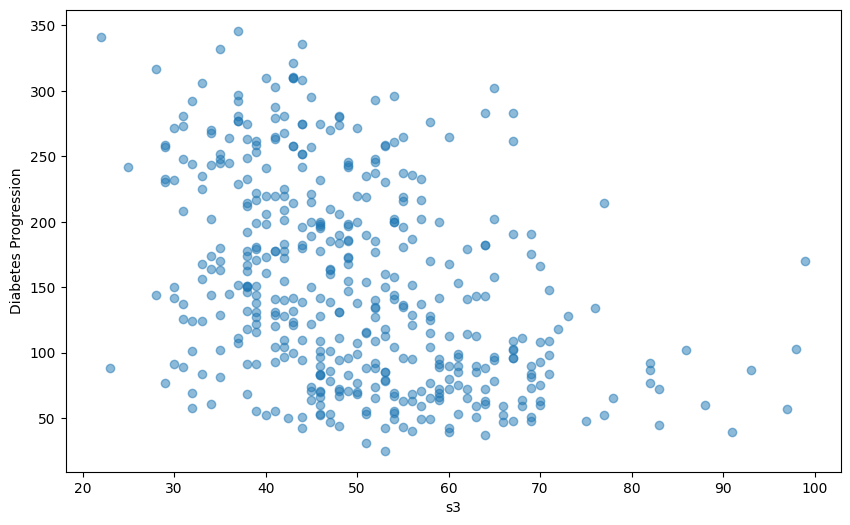

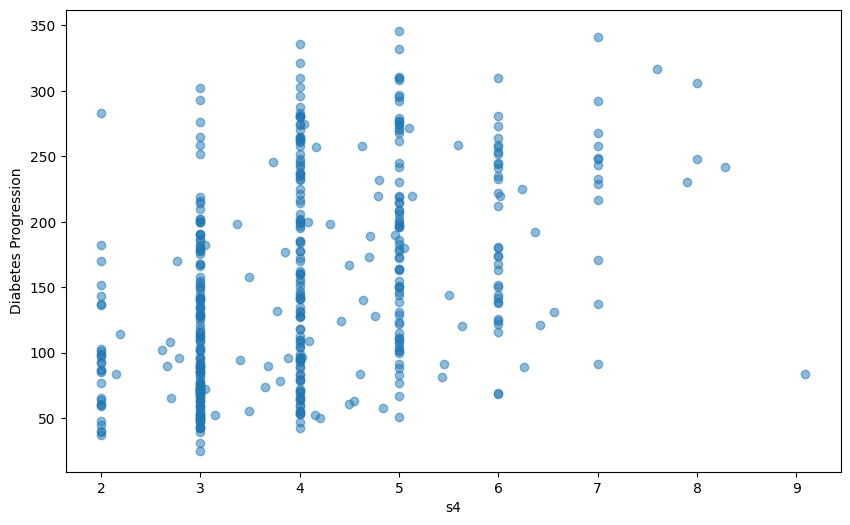

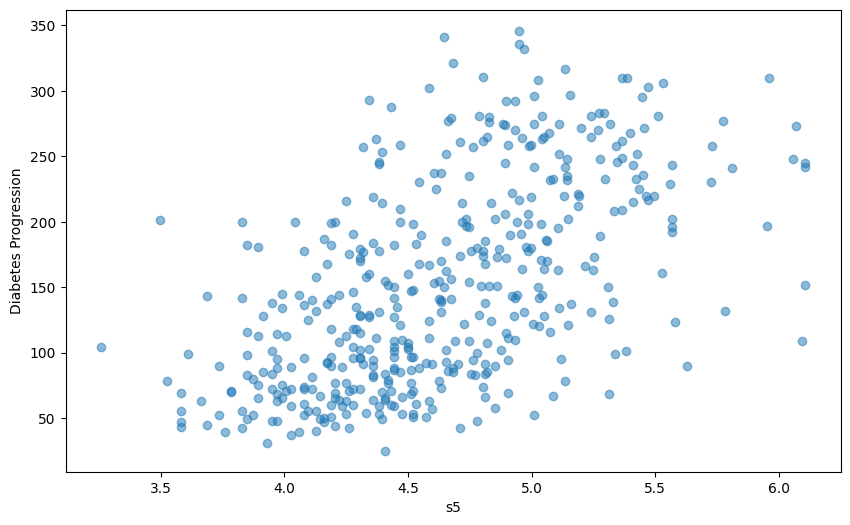

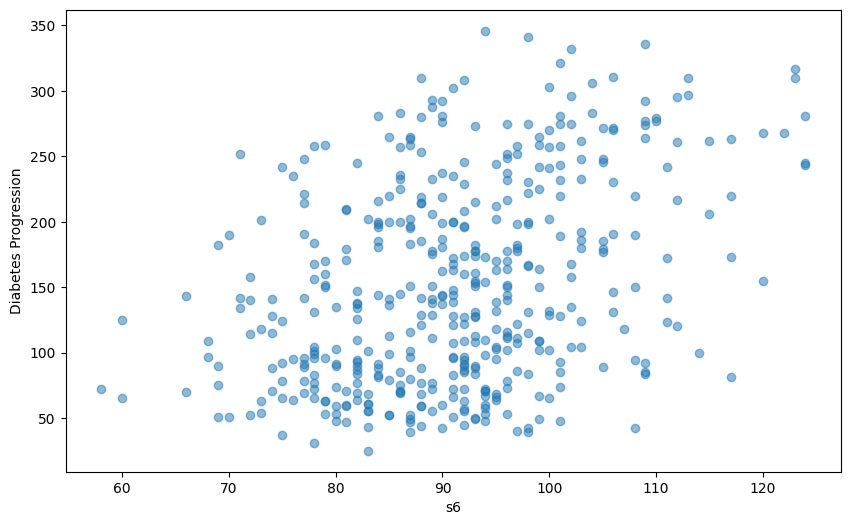

In [14]:
# visualize the data
import matplotlib.pyplot as plt
for col in X.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X[col], y, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Diabetes Progression")
    plt.show()

In [42]:
num_cols = [i for i in X.columns if i not in ["sex"]]  # 数值列名
cat_cols = ["sex"]  # 类别列名

In [15]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [58]:
corr_matrix = data.corr()
corr_matrix[abs(corr_matrix) > 0.8]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bp,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1,NaN,NaN,NaN,NaN,1.000000,0.896663,NaN,NaN,NaN,NaN,NaN
s2,NaN,NaN,NaN,NaN,0.896663,1.000000,NaN,NaN,NaN,NaN,NaN
s3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
s4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
s5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
s6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


s1 and s2 are highly correlated with 0.9 correlation. Keep in mind when interpreting linear model coefficient. Interpret coe as a group.

# Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), cat_cols),
    ],
    remainder="drop" # default
)
pipe1 = Pipeline([
    ("prep", preprocess),
    ("ridge", Ridge())
])

param_grid = {
    "ridge__alpha": [0.01, 0.1, 1, 10]
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

gs = GridSearchCV(pipe1, param_grid, 
    scoring="neg_root_mean_squared_error", # r2 或 neg_root_mean_squared_error
    cv=cv, n_jobs=-1, return_train_score=True)
gs.fit(X_train, y_train)

best_pipe1 = gs.best_estimator_

In [45]:
best_idx = gs.best_index_
cvres = gs.cv_results_

mean_tr = cvres["mean_train_score"][best_idx]
mean_va = cvres["mean_test_score"][best_idx]
std_va  = cvres["std_test_score"][best_idx]

print("best params:", gs.best_params_)
print("CV train neg_root_mean_squared_error:", mean_tr)
print("CV valid neg_root_mean_squared_error:", mean_va, "±", std_va)
print("gap (train-valid):", mean_tr - mean_va)

best params: {'ridge__alpha': 1}
CV train neg_root_mean_squared_error: -53.14210645936413
CV valid neg_root_mean_squared_error: -55.741202538617074 ± 1.8921561468014683
gap (train-valid): 2.599096079252945


In [46]:
reg = best_pipe1.named_steps["ridge"]
reg.coef_

array([  1.80167465,  25.74070179,  16.72683761, -34.66485507,
        17.05231117,   3.37568201,  11.74902759,  31.38314514,
         2.45630412,  11.42732646, -11.42732646])

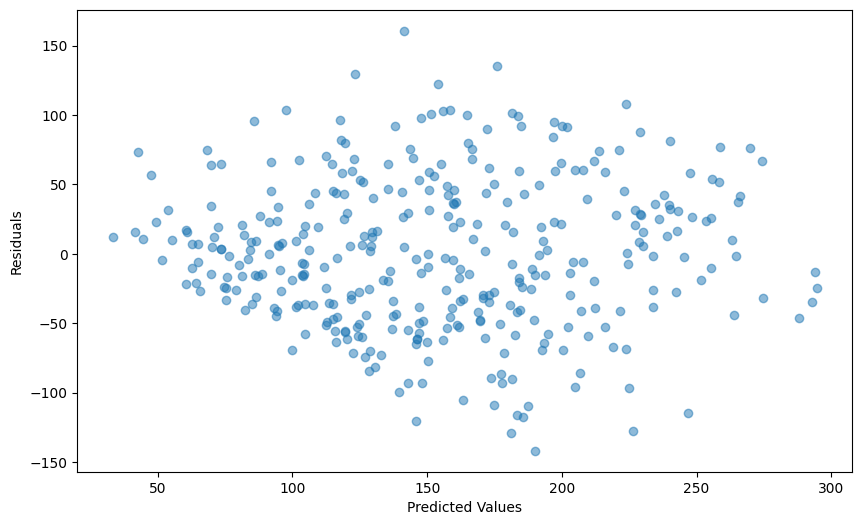

In [59]:
# residual plot

y_pred = best_pipe1.predict(X_train)
residual = y_train - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residual, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Mean looks roughly centered around 0.

Heteroskedasticity (variance changes with fitted)

Some large outliers: A few points have residuals near ±140–160. Those can dominate RMSE and can indicate, true outliers / data issues, missing nonlinear features/interactions

No very obvious curvature: I don’t see a clear U-shape / S-shape, so the mean relationship might be reasonably captured, but the error distribution/variance is not constant.

In [47]:
y_pred = best_pipe1.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 53.77675849543452


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
pipe2 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = {
    "random_forest__n_estimators": [100, 200, 300],
    "random_forest__max_depth": [4, 8],
    "random_forest__min_samples_split": [5, 10],
    "random_forest__min_samples_leaf": [5, 10, 15],
    "random_forest__max_features": [0.3, 0.5, 0.7]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gs2 = RandomizedSearchCV(estimator=pipe2, param_distributions=param_grid, 
    n_iter=10,
    scoring="neg_root_mean_squared_error", cv=cv, 
    n_jobs=-1, return_train_score=True)

gs2.fit(X_train, y_train)
best_pipe2 = gs2.best_estimator_

In scikit-learn, the default RandomForestRegressor hyperparameters (current “stable” docs) are: n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=1.0 (i.e., use all features per split), bootstrap=True, oob_score=False, n_jobs=None, random_state=None, ccp_alpha=0.0, max_samples=None (i.e., bootstrap sample size = n_samples).

A few key ones people care about:

n_estimators=100 (changed from 10 → 100 in 0.22).

max_features=1.0 means “consider all features” (changed from "auto" → 1.0 in 1.1).

max_depth=None makes fully grown trees unless constrained by other limits.

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.get_params()

In [54]:
best_idx = gs2.best_index_
cvres = gs2.cv_results_

mean_tr = cvres["mean_train_score"][best_idx]
mean_va = cvres["mean_test_score"][best_idx]
std_va  = cvres["std_test_score"][best_idx]

print("best params:", gs2.best_params_)
print("CV train neg_root_mean_squared_error:", mean_tr)
print("CV valid neg_root_mean_squared_error:", mean_va, "±", std_va)
print("gap (train-valid):", mean_tr - mean_va)


best params: {'random_forest__n_estimators': 300, 'random_forest__min_samples_split': 10, 'random_forest__min_samples_leaf': 10, 'random_forest__max_features': 0.5, 'random_forest__max_depth': 8}
CV train neg_root_mean_squared_error: -47.595456833496044
CV valid neg_root_mean_squared_error: -57.20355906484614 ± 2.796245599194785
gap (train-valid): 9.608102231350095


In [55]:
reg = best_pipe2.named_steps["random_forest"]
reg.feature_importances_

array([0.02347579, 0.00802141, 0.37679081, 0.09636356, 0.02472295,
       0.02697114, 0.05771613, 0.04551501, 0.28467883, 0.05574438])

Feature importance in random forest share similar rank with that in lasso regression.

In [56]:
y_pred = best_pipe2.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 51.9089327051761
